# Experiment 3: The Cosine Coefficient

**cosine coefficient**
$$
\frac{\lvert X \cap Y \rvert}{\lvert X \rvert^{1/2} \cdot \lvert Y \rvert^{1/2}}
$$

The cosine coefficient measures the ratio of the number of shared words over the square root of the product of the length of the words in each sentence.

In [1]:
import sys
import numpy as np
sys.path.append('../')
import libs.utils as utils
import libs.stats as stats
import libs.preprocessing as pp
import libs.word_overlap as wo
from importlib import reload
import spacy

In [2]:
df2_en = utils.load_dataframe(language='en', version=2)
display(df2_en.head(2))
print(len(df2_en))

nlp_en = spacy.load('en')

ID  AID  QID                                             Prompt  \
0  1.1    1    1   What is the role of a prototype program in pr...   
1  1.1    1    1   What is the role of a prototype program in pr...   

                                        Model Answer  \
0   To simulate the behaviour of portions of the ...   
1   To simulate the behaviour of portions of the ...   

                                      Student Answer  Score  
0   High risk problems are address in the prototy...    3.5  
1   To simulate portions of the desired final pro...    5.0

2442


## E1.1 v2.0_en English Language Dataset

In [3]:
pipeline_phases = { 'lowercase' : pp.lowercase, 
                    'stopwords' : pp.remove_stopwords,
                    'punctuation' : pp.remove_punctuation,
                    'stemming' : pp.stem}

pipeline1 = pp.create_pipeline(pipeline_phases, tokenizer=pp.tokenize)

res_e1_1 = wo.execute_word_overlap_model(df2_en, pipeline1, wo.cosine_coefficient)

Accuracy: 10.729%
Precision: 49.389%
Recall: 10.729%
F1-Measure: 13.005%
Pearson's R: 0.45
Cohen's Kappa: 0.01
RMSE: 2.61
MAE: 2.27
Y-True Mean: 4.05
Y-Pred Mean: 1.82
Y-True Std Deviation: 1.20
Y-Pred Std Deviation: 1.38


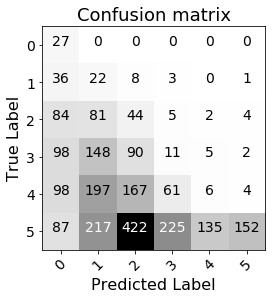

In [4]:
stats.print_big4(res_e1_1['y_true'], res_e1_1['y_pred'])
stats.print_stats(res_e1_1['y_true'], res_e1_1['y_pred'])
stats.plot_confusion_matrix(stats.cm(res_e1_1['y_true'], res_e1_1['y_pred']), classes=np.unique(res_e1_1['y_true']))

## E1.2 v2.0_en English Language Dataset

1. Spacy Preprocessing (Lemmatization)

In [5]:
pipeline_phases = { 'punctuation' : pp.spacy_punctuation,
                    'lemmatization' : pp.spacy_lemmatize,
                    'stopwords' : pp.create_stopword_remover(pp.EN_STOPS) }

pipeline1_2 = pp.create_spacy_pipeline(nlp=nlp_en, pipeline_map=pipeline_phases)

res_e1_2 = wo.execute_word_overlap_model(df2_en, pipeline1_2, wo.cosine_coefficient)

Accuracy: 12.817%
Precision: 50.274%
Recall: 12.817%
F1-Measure: 14.563%
Pearson's R: 0.41
Cohen's Kappa: 0.01
RMSE: 2.22
MAE: 1.91
Y-True Mean: 4.05
Y-Pred Mean: 2.24
Y-True Std Deviation: 1.20
Y-Pred Std Deviation: 1.18


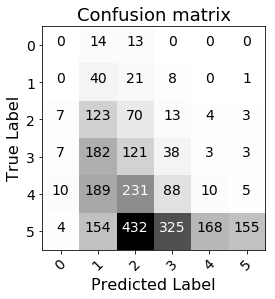

In [6]:
stats.print_big4(res_e1_2['y_true'], res_e1_2['y_pred'])
stats.print_stats(res_e1_2['y_true'], res_e1_2['y_pred'])
stats.plot_confusion_matrix(stats.cm(res_e1_2['y_true'], res_e1_2['y_pred']), classes=np.unique(res_e1_2['y_true']))

## E2.1 v2.0_en English Pass / Fail

In [7]:
df2_en_pf = utils.load_dataframe(language='en', version=2, pass_fail=True)
display(df2_en_pf.head(2))
print(len(df2_en_pf))

pipeline_phases = { 'punctuation' : pp.spacy_punctuation,
                    'lemmatization' : pp.spacy_lemmatize,
                    'stopwords' : pp.create_stopword_remover(pp.EN_STOPS) }

pipeline2_1 = pp.create_spacy_pipeline(nlp=nlp_en, pipeline_map=pipeline_phases)

res_e2_1 = wo.execute_word_overlap_model(df2_en_pf, pipeline2_1, wo.cosine_coefficient)

ID  AID  QID                                             Prompt  \
0  1.1    1    1   What is the role of a prototype program in pr...   
1  1.1    1    1   What is the role of a prototype program in pr...   

                                        Model Answer  \
0   To simulate the behaviour of portions of the ...   
1   To simulate the behaviour of portions of the ...   

                                      Student Answer  Score  
0   High risk problems are address in the prototy...    1.0  
1   To simulate portions of the desired final pro...    1.0

2442


Accuracy: 39.885%
Precision: 90.620%
Recall: 39.885%
F1-Measure: 49.623%
Pearson's R: 0.14
Cohen's Kappa: 0.06
RMSE: 0.78
MAE: 0.60
Y-True Mean: 0.92
Y-Pred Mean: 0.34
Y-True Std Deviation: 0.27
Y-Pred Std Deviation: 0.47


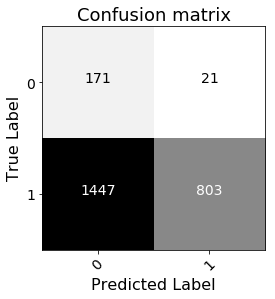

In [8]:
res_e2_1['y_pred'] = utils.convert_to_pass_fail(res_e2_1['y_pred'])

stats.print_big4(res_e2_1['y_true'], res_e2_1['y_pred'])
stats.print_stats(res_e2_1['y_true'], res_e2_1['y_pred'])
stats.plot_confusion_matrix(stats.cm(res_e2_1['y_true'], res_e2_1['y_pred']), classes=np.unique(res_e2_1['y_true']))

## E3.1 v2.0_de German 

1. Lemmatization

In [9]:
df2_de = utils.load_dataframe(language='de', version=2)
display(df2_de.head(2))
print(len(df2_de))

nlp_de = spacy.load('de')

pipeline_phases = { 'punctuation' : pp.spacy_punctuation,
                    'lemmatization' : pp.spacy_lemmatize,
                    'stopwords' : pp.create_stopword_remover(pp.DE_STOPS) }

pipeline3_1 = pp.create_spacy_pipeline(nlp=nlp_de, pipeline_map=pipeline_phases)

res_e3_1 = wo.execute_word_overlap_model(df2_de, pipeline3_1, wo.cosine_coefficient)

AID  QID                                             Prompt  \
0    1    1  Welche Rolle spielt ein Prototyp-Programm bei ...   
1    1    1  Welche Rolle spielt ein Prototyp-Programm bei ...   

                                        Model Answer  Score  \
0  Um das Verhalten von Teilen des gewünschten So...    3.5   
1  Um das Verhalten von Teilen des gewünschten So...    5.0   

                                      Student Answer  
0  In dem Prototyp-Programm werden Probleme mit h...  
1  Teile des gewünschten Endprodukts mit einem sc...

2442


Accuracy: 6.757%
Precision: 50.029%
Recall: 6.757%
F1-Measure: 8.618%
Pearson's R: 0.34
Cohen's Kappa: 0.00
RMSE: 3.24
MAE: 2.92
Y-True Mean: 4.05
Y-Pred Mean: 1.15
Y-True Std Deviation: 1.20
Y-Pred Std Deviation: 1.31


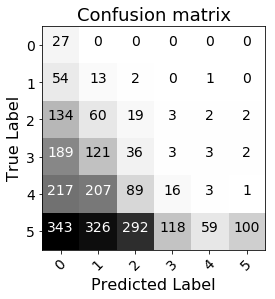

In [10]:
stats.print_big4(res_e3_1['y_true'], res_e3_1['y_pred'])
stats.print_stats(res_e3_1['y_true'], res_e3_1['y_pred'])
stats.plot_confusion_matrix(stats.cm(res_e3_1['y_true'], res_e3_1['y_pred']), classes=np.unique(res_e3_1['y_true']))

## E3.2 v2.0_de German Pass / Fail

In [11]:
df2_de_pf = utils.load_dataframe(language='de', version=2, pass_fail=True)
display(df2_de_pf.head(2))
print(len(df2_de_pf))

pipeline_phases = { 'punctuation' : pp.spacy_punctuation,
                    'lemmatization' : pp.spacy_lemmatize,
                    'stopwords' : pp.create_stopword_remover(pp.DE_STOPS) }

pipeline3_2 = pp.create_spacy_pipeline(nlp=nlp_de, pipeline_map=pipeline_phases)

res_e3_2 = wo.execute_word_overlap_model(df2_de_pf, pipeline3_2, wo.cosine_coefficient)

AID  QID                                             Prompt  \
0    1    1  Welche Rolle spielt ein Prototyp-Programm bei ...   
1    1    1  Welche Rolle spielt ein Prototyp-Programm bei ...   

                                        Model Answer  Score  \
0  Um das Verhalten von Teilen des gewünschten So...    1.0   
1  Um das Verhalten von Teilen des gewünschten So...    1.0   

                                      Student Answer  
0  In dem Prototyp-Programm werden Probleme mit h...  
1  Teile des gewünschten Endprodukts mit einem sc...

2442


Accuracy: 20.188%
Precision: 91.058%
Recall: 20.188%
F1-Measure: 23.333%
Pearson's R: 0.08
Cohen's Kappa: 0.02
RMSE: 0.89
MAE: 0.80
Y-True Mean: 0.92
Y-Pred Mean: 0.13
Y-True Std Deviation: 0.27
Y-Pred Std Deviation: 0.33


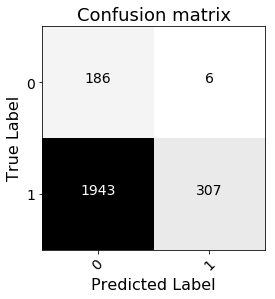

In [12]:
res_e3_2['y_pred'] = utils.convert_to_pass_fail(res_e3_2['y_pred'])

stats.print_big4(res_e3_2['y_true'], res_e3_2['y_pred'])
stats.print_stats(res_e3_2['y_true'], res_e3_2['y_pred'])
stats.plot_confusion_matrix(stats.cm(res_e3_2['y_true'], res_e3_2['y_pred']), classes=np.unique(res_e3_2['y_true']))

## E4.1 v2.0_es Spanish - regular

In [13]:
df2_es = utils.load_dataframe(language='es', version=2)
display(df2_es.head(2))
print(len(df2_es))

nlp_es = spacy.load('es')

pipeline_phases = { 'punctuation' : pp.spacy_punctuation,
                    'lemmatization' : pp.spacy_lemmatize,
                    'stopwords' : pp.create_stopword_remover(pp.ES_STOPS) }

pipeline4_1 = pp.create_spacy_pipeline(nlp=nlp_es, pipeline_map=pipeline_phases)

res_e4_1 = wo.execute_word_overlap_model(df2_es, pipeline4_1, wo.cosine_coefficient)

AID  QID                                             Prompt  \
0    1    1  ¿Cuál es el papel de un programa prototipo en ...   
1    1    1  ¿Cuál es el papel de un programa prototipo en ...   

                                        Model Answer  Score  \
0  Para simular el comportamiento de porciones de...    3.5   
1  Para simular el comportamiento de porciones de...    5.0   

                                      Student Answer  
0  Los problemas de alto riesgo se abordan en el ...  
1  Para simular porciones del producto final dese...

2442


Accuracy: 7.125%
Precision: 47.370%
Recall: 7.125%
F1-Measure: 8.091%
Pearson's R: 0.40
Cohen's Kappa: -0.01
RMSE: 2.90
MAE: 2.59
Y-True Mean: 4.05
Y-Pred Mean: 1.49
Y-True Std Deviation: 1.20
Y-Pred Std Deviation: 1.29


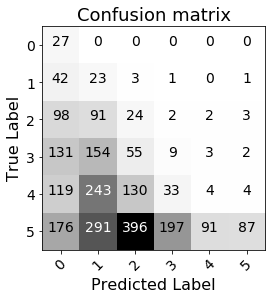

In [14]:
stats.print_big4(res_e4_1['y_true'], res_e4_1['y_pred'])
stats.print_stats(res_e4_1['y_true'], res_e4_1['y_pred'])
stats.plot_confusion_matrix(stats.cm(res_e4_1['y_true'], res_e4_1['y_pred']), classes=np.unique(res_e4_1['y_true']))

## E4.2 v2.0_es Spanish Pass/Fail

In [15]:
df2_es_pf = utils.load_dataframe(language='es', version=2, pass_fail=True)
display(df2_es_pf.head(2))
print(len(df2_es_pf))

pipeline_phases = { 'punctuation' : pp.spacy_punctuation,
                    'lemmatization' : pp.spacy_lemmatize,
                    'stopwords' : pp.create_stopword_remover(pp.ES_STOPS) }

pipeline4_2 = pp.create_spacy_pipeline(nlp=nlp_es, pipeline_map=pipeline_phases)

res_e4_2 = wo.execute_word_overlap_model(df2_es_pf, pipeline4_2, wo.jaccard_coefficient)

AID  QID                                             Prompt  \
0    1    1  ¿Cuál es el papel de un programa prototipo en ...   
1    1    1  ¿Cuál es el papel de un programa prototipo en ...   

                                        Model Answer  Score  \
0  Para simular el comportamiento de porciones de...    1.0   
1  Para simular el comportamiento de porciones de...    1.0   

                                      Student Answer  
0  Los problemas de alto riesgo se abordan en el ...  
1  Para simular porciones del producto final dese...

2442


Accuracy: 14.373%
Precision: 90.058%
Recall: 14.373%
F1-Measure: 13.686%
Pearson's R: 0.05
Cohen's Kappa: 0.01
RMSE: 0.93
MAE: 0.86
Y-True Mean: 0.92
Y-Pred Mean: 0.07
Y-True Std Deviation: 0.27
Y-Pred Std Deviation: 0.25


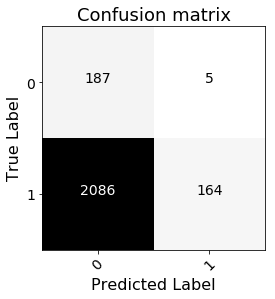

In [16]:
res_e4_2['y_pred'] = utils.convert_to_pass_fail(res_e4_2['y_pred'])

stats.print_big4(res_e4_2['y_true'], res_e4_2['y_pred'])
stats.print_stats(res_e4_2['y_true'], res_e4_2['y_pred'])
stats.plot_confusion_matrix(stats.cm(res_e4_2['y_true'], res_e4_2['y_pred']), classes=np.unique(res_e4_2['y_true']))